# **Praktikum II & III Machine Learning dan Modern Prediction**

---



'''
=================================================

Nama  : Lutfiah Firlian

NPM : F1F022025

**Feature Engineering**
=================================================
'''

## **Latar Belakang**

---
Era transformasi digital menghadirkan Machine Learning (Pembelajaran Mesin) sebagai instrumen vital untuk mengekstrak informasi berharga dari kumpulan data masif tanpa harus diprogram secara eksplisit untuk setiap aturan tertentu. Salah satu paradigma utama dalam domain ini adalah Supervised Learning (Pembelajaran Terawasi), yaitu pendekatan di mana algoritma dilatih menggunakan data historis yang memuat pasangan input dan output yang sudah diketahui. Ketika variabel target bersifat numerik atau kontinu, permasalahan tersebut diklasifikasikan sebagai tugas Regresi (James et al., 2013). Tujuan analisis regresi ialah membangun fungsi pemetaan yang mampu memperkirakan nilai variabel dependen berdasarkan kombinasi variabel independen dengan meminimalkan tingkat kesalahan prediksi pada data baru.

Pendekatan non-parametrik untuk permasalahan regresi salah satunya diwujudkan melalui metode Regression Tree (Pohon Keputusan) yang banyak dipilih karena sifatnya yang mudah diinterpretasikan. Metode ini bekerja dengan mempartisi ruang data menjadi wilayah-wilayah lebih kecil dan homogen melalui serangkaian aturan keputusan hierarkis “jika–maka” (Breiman et al., 1984). Keunggulan utama struktur pohon keputusan mencakup kemampuannya menangkap hubungan non-linear yang kompleks, ketahanan terhadap outliers, serta tidak memerlukan asumsi distribusi data yang ketat sebagaimana metode statistik klasik.

Sebagai pembanding, algoritma K-Nearest Neighbors (KNN) menawarkan pendekatan instance-based atau lazy learning, di mana prediksi diperoleh dengan mengidentifikasi sejumlah $K$ tetangga terdekat dari titik data baru lalu menghitung nilai rata-ratanya (Cover & Hart, 1967). Ketergantungan KNN pada perhitungan jarak geometris misalnya Euclidean Distance menjadikannya sangat sensitif terhadap skala data (scale-sensitive). Oleh sebab itu, membandingkan performa KNN yang memerlukan standarisasi data dengan Regression Tree yang cenderung invarian terhadap skala menjadi eksperimen penting untuk memahami karakteristik data sekaligus efektivitas teknik preprocessing yang digunakan.






## **Rumusan Masalah**

---



Adapun rumusan masalah penelitian kali ini yaitu:
1. Apa konsep dasar algoritma Decision Tree?
2. Bagaimana cara membedakan antara Classification Tree dan Regression Tree?
3. Bagaimana cara menerapkan Decision Tree untuk klasifikasi?
4. Bagaimana cara melakukan evaluasi model Decision Tree menggunakan confusion matrix dan accuracy score?
5. Menginterpretasikan hasil model dalam bentuk visualisasi pohon keputusan.
6. Melatih kemampuan analisis melalui latihan mandiri menggunakan dataset lain.
7. Memahami konsep dasar algoritma K-Nearest Neighbors (KNN) untuk
klasifikasi.
8. Mengimplementasikan KNN menggunakan pustaka Scikit-learn di Python.
9. Mengevaluasi performa model KNN menggunakan accuracy score dan
confusion matrix

## **Tujuan Penelitian**

Adapun tujuan penelitian kali ini yaitu:
Adapun rumusan masalah penelitian kali ini yaitu:
1. Menjelaskan konsep dasar algoritma Decision Tree.
2. Membedakan antara Classification Tree dan Regression Tree.
3. Menerapkan Decision Tree untuk klasifikasi.
4. Melakukan evaluasi model Decision Tree menggunakan confusion matrix dan
accuracy score.
5. Menginterpretasikan hasil model dalam bentuk visualisasi pohon keputusan.
6. Melatih kemampuan analisis melalui latihan mandiri menggunakan dataset lain.
7. Memahami konsep dasar algoritma K-Nearest Neighbors (KNN) untuk
klasifikasi.
8. Mengimplementasikan KNN menggunakan pustaka Scikit-learn di Python.
9. Mengevaluasi performa model KNN menggunakan accuracy score dan
confusion matrix

## **Mengimpor _Libraries_**

---



Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [ ]:
!pip install feature_engine

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,  OrdinalEncoder, LabelEncoder,  StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

## **Memuat Data**

---



Pada penelitian kali ini digunakan sebuat dataset yaitu, "BMW Sales Data Tahun 2010-2024". Data ini dapat digunakan untuk memprediksi jumlah volume penjualan mobil BMW. Data yang digunakan merupakan data sekunder, berasal dari Asisten Praktikum. Dataset dapat diliat pada link berikut:https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv


---
Pertama dilakukan input data, pada data set yang akan digunakan.


In [ ]:
# Load penelitian Dataset

bmw_df = pd.read_csv(' https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv', sep=';')
bmw_df

Model  Year         Region   Color Fuel_Type Transmission  \
0      5 Series  2016           Asia     Red    Petrol       Manual   
1            i8  2013  North America     Red    Hybrid    Automatic   
2      5 Series  2022  North America    Blue    Petrol    Automatic   
3            X3  2024    Middle East    Blue    Petrol    Automatic   
4      7 Series  2020  South America   Black    Diesel       Manual   
...         ...   ...            ...     ...       ...          ...   
49995        i3  2014           Asia     Red    Hybrid       Manual   
49996        i3  2023    Middle East  Silver  Electric       Manual   
49997  5 Series  2010    Middle East     Red    Petrol    Automatic   
49998        i3  2020           Asia   White  Electric    Automatic   
49999        X1  2020  North America    Blue    Diesel       Manual   

       Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  
0                3.5      151748      98740          8300  
1                1.6      121671      79219          3428  
2                4.5       10991     113265          6994  
3                1.7       27255      60971          4047  
4                2.1      122131      49898          3080  
...              ...         ...        ...           ...  
49995            4.6      151030      42932          8182  
49996            4.2      147396      48714          9816  
49997            4.5      174939      46126          8280  
49998            3.8        3379      58566          9486  
49999            3.3      171003      77492          1764  

[50000 rows x 10 columns]

Selanjutnya dilakukan pengecekkan tipe data, pada masing-masing variabel dan identifikasi apakah terdapat missing value pada data.

In [ ]:
#melihat tipe data
bmw_df.dtypes

Model             object
Year               int64
Region            object
Color             object
Fuel_Type         object
Transmission      object
Engine_Size_L    float64
Mileage_KM         int64
Price_USD          int64
Sales_Volume       int64
dtype: object

In [ ]:
# Check Missing Values
bmw_df.isnull().sum()

Model            0
Year             0
Region           0
Color            0
Fuel_Type        0
Transmission     0
Engine_Size_L    0
Mileage_KM       0
Price_USD        0
Sales_Volume     0
dtype: int64

> Data yang digunakan kali ini terdiri dari 10 variabel dengan total pengamatan yaitu 49.999. Terdapat total 4 data yang bertipe integer, yaitu Year (Tahun), Mileage_KM, Price_USD dan Sales_Volume. Terdapat satu data bertipe float yaitu, "Engine_Size_L". Lima data lainnya berupa objek dengan nama variabel, Model, Region, Color, Fuel_Type	dan Transmission. Setelah  itu dilihat bahwa 10 variabel tersebut, tidak terdapat missing-valye atau data yang kosong.




## **Analisis Data Eksploratif**

---

Sebelum dilakukan analisis data lebih lanjut, terlebih dahulu dilakukan ekplorasi data. Beikut ditampilkan hasil statistik deskriptif dari data iklim yang digunakan pada penelitian ini.

In [ ]:
print(bmw_df.describe())

               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000




> Berdasarkan analisis deskriptif pada 50.000 data transaksi, hasil statistik deskritip menunjukkan data bisa dibilang berdistribusi normal atau simetris, terlihat dari nilai rata-rata (mean) dan tengah (median) yang memiliki selisih yang kecil hampir di seluruh variabel. Pada data juga menunjukkan bahwa terdapat variabilitas yang tinggi dalam populasi sampel, direpresentasikan oleh rentang (range) yang lebar antara nilai minimum dan maksimum pada variabel Mileage_KM dan Price_USD. Hal ini diperkuat dengan nilai standar deviasi yang cukup besar, yang menandakan bahwa sebaran data sangat bervariasi di sekitar nilai rata-ratanya



## _**Feature Engineering**_

### A- Splitting Data

Sebelum masuk ke tahap pemodelan, langkah pertama yang dilakukan adalah membagi data atau data splitting. Proses ini sangat penting agar bisa digunakan untuk menguji kehandalan model secara objektif dengan memisahkan dataset menjadi data latih (training set) dan data uji (testing set).Pada kasus dataset BMW Sales ini, variabel Sales_Volume ditetapkan sebagai target prediksi. Sedangkan untuk variabel prediktornya akan digunakan variabel  bertipe numerik yaitu,Engine_Size_L, Mileage_KM, dan Price_USD yang diasumsikan memiliki pengaruh kuat terhadap naik-turunnya volume penjualan.

In [ ]:
#mendeskripsikan variabel X dan y
X = bmw_df.drop('Sales_Volume', axis = 1)
y = bmw_df['Sales_Volume']

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.15,random_state=200)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)


Train size :  (42500, 9)
Test size  :  (7500, 9)




> Data tersebut baik variabel X dan Variabel Y dipisah menjadi data training dan data testing dengan perbandingan 85% Training : 15% Testing. Diperoleh X_train dan Y_train untuk data training serta X_test dan y_test untuk data testing.



### B- Scaling

Sebelum masuk ke pemodelan, kita perlu melakukan Feature Scaling untuk menyamakan rentang nilai antar variabel agar algoritma (terutama KNN) tidak bias akibat perbedaan skala angka yang ekstrem, seperti ketimpangan antara Engine_Size yang kecil dan Price yang besar. Namun, sebelum scaling diterapkan, langkah pertama yang harus dilakukan adalah mengecek apakah data berdistribusi normal atau tidak, karena karakteristik distribusi inilah yang akan menjadi dasar pertimbangan kita dalam memilih metode scaling yang paling tepat.

In [ ]:
# Identify numerical features directly from X_train
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

# Initialize lists to store feature names based on skewness
nilai_skew = []
nilai_skew_normal = []

# Calculate skewness for each numerical feature in X_train
print("Calculating skewness for numerical features in X_train:")
for feature in numerical_features:
    skewness = X_train[feature].skew()
    print(f"  {feature}: {skewness:.4f}")
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(feature)
    else:
        nilai_skew.append(feature)

# Display the categorized features
print('\nKolom yang mempunyai nilai skewness sedang (skewed):', nilai_skew)
print('Kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

Calculating skewness for numerical features in X_train:
  Year: -0.0050
  Engine_Size_L: -0.0040
  Mileage_KM: -0.0063
  Price_USD: 0.0060

Kolom yang mempunyai nilai skewness sedang (skewed): []
Kolom yang mempunyai nilai skewness normal: ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']




> Berdasarkan hasil perhitungan skewnees pada data train, terlihat bahwa variabel yang digunakan memiliki nilai skewness yang rendah. Karena data terbukti berdistribusi normal namun memiliki rentang nilai yang sangat berbeda, yang mana satuan kecil pada mesin dan lainnya memiliki satuan ribuan, maka metode scaling yang diputuskan untuk dipakai adalah Standard Scaler. Metode ini dipilih karena sangat efektif mempertahankan karakteristik distribusi normal data sekaligus menyetarakan skalanya agar algoritma dapat bekerja optimal.



Maka akan dilakukan standar scaler sebagai berikut.

In [ ]:

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
standard_scaler = StandardScaler()
standard_scaler.fit(X_train[nilai_skew_normal])
X_train_scaled[nilai_skew_normal] = standard_scaler.transform(X_train[nilai_skew_normal])
X_test_scaled[nilai_skew_normal] = standard_scaler.transform(X_test[nilai_skew_normal])
print("Preview Data Train setelah Scaling:")
print(X_train_scaled[nilai_skew_normal].head())

Preview Data Train setelah Scaling:
           Year  Engine_Size_L  Mileage_KM  Price_USD
21511 -0.006399      -1.534514   -1.353816  -1.593330
14662  0.224651      -1.039125   -0.545583  -1.535180
48680 -0.468498       1.140585    0.256077  -1.678095
41924  0.455701      -0.345581    1.719105   0.402065
5274   0.224651       0.942430    0.844152   1.325671




> Tampilan data tersebut menunjukkan bahwa seluruh fitur numerik, Engine_Size_L, Mileage_KM, dan Price_USD telah ditransformasikan menggunakan StandardScaler. Proses ini mengubah setiap fitur sehingga memiliki rata-rata = 0 dan standar deviasi = 1.

## **Visualisasi Data**

**Distribusi Variabel Y**

---
Pengecekan distribusi pada variabel respon (Sales_Volume) dilakukan untuk memastikan tidak adanya outliers yang dapat mendistorsi proses pembelajaran model, serta untuk menentukan metrik evaluasi yang relevan berdasarkan rentang nilai data tersebut.


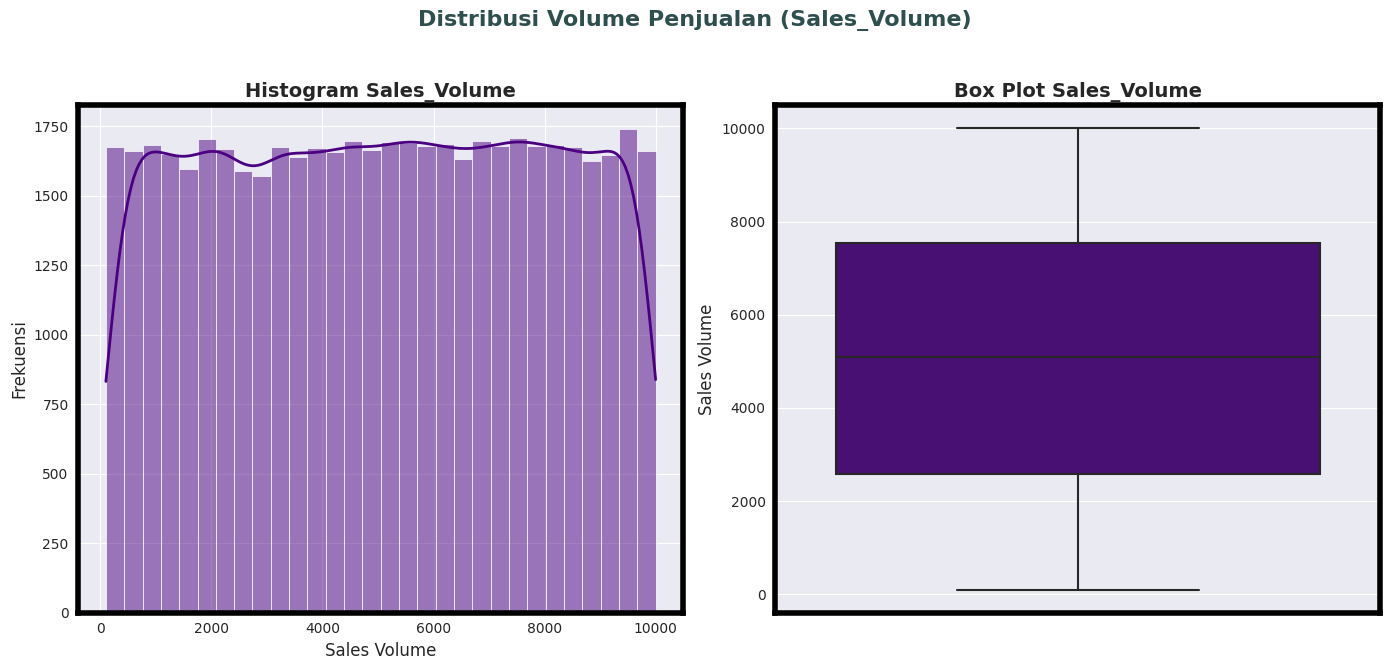

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
plt.suptitle('Distribusi Volume Penjualan (Sales_Volume)', fontsize=16, fontweight='bold', color='darkslategray')

ax1 = plt.subplot(1, 2, 1)
sns.histplot(bmw_df['Sales_Volume'], kde=True, bins=30, color='#4B0082', edgecolor='white', linewidth=0.5,
             line_kws={'color': '#4B0082', 'linewidth': 2}) # Pastikan garis KDE juga ungu gelap
plt.title('Histogram Sales_Volume', fontsize=14, fontweight='bold')
plt.xlabel('Sales Volume', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

ax2 = plt.subplot(1, 2, 2)
sns.boxplot(y=bmw_df['Sales_Volume'], color='#4B0082', linewidth=1.5,
            flierprops=dict(marker='o', markerfacecolor='#4B0082', markersize=6, linestyle='none'))
plt.title('Box Plot Sales_Volume', fontsize=14, fontweight='bold')
plt.ylabel('Sales Volume', fontsize=12)

for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(4)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



> Berdasarkan visualisasi distribusi variabel respon Sales_Volume, data menunjukkan karakteristik Distribusi Uniform yang simetris, di mana frekuensi data tersebar merata di seluruh rentang nilai dan  tidak ditemukannya outliers (pencilan) pada Box plot. Model akan memiliki kesempatan yang adil untuk mempelajari pola data, baik pada angka penjualan rendah, menengah, maupun tinggi tanpa terganggu oleh nilai ekstrem atau bias pada rentang tertentu.



**Perbandingan Distribusi dan Melihat Pola Hubungan Variabel Y dan X**

---
Analisis bivariat ini dilakukan untuk melihat pola hubungan atau korelasi masing-masing variabel prediktor terhadap variabel respon. Hal ini ingin melihat apakah terdapat tren linier pada setiap hubungan variabel-variabel tersebut.


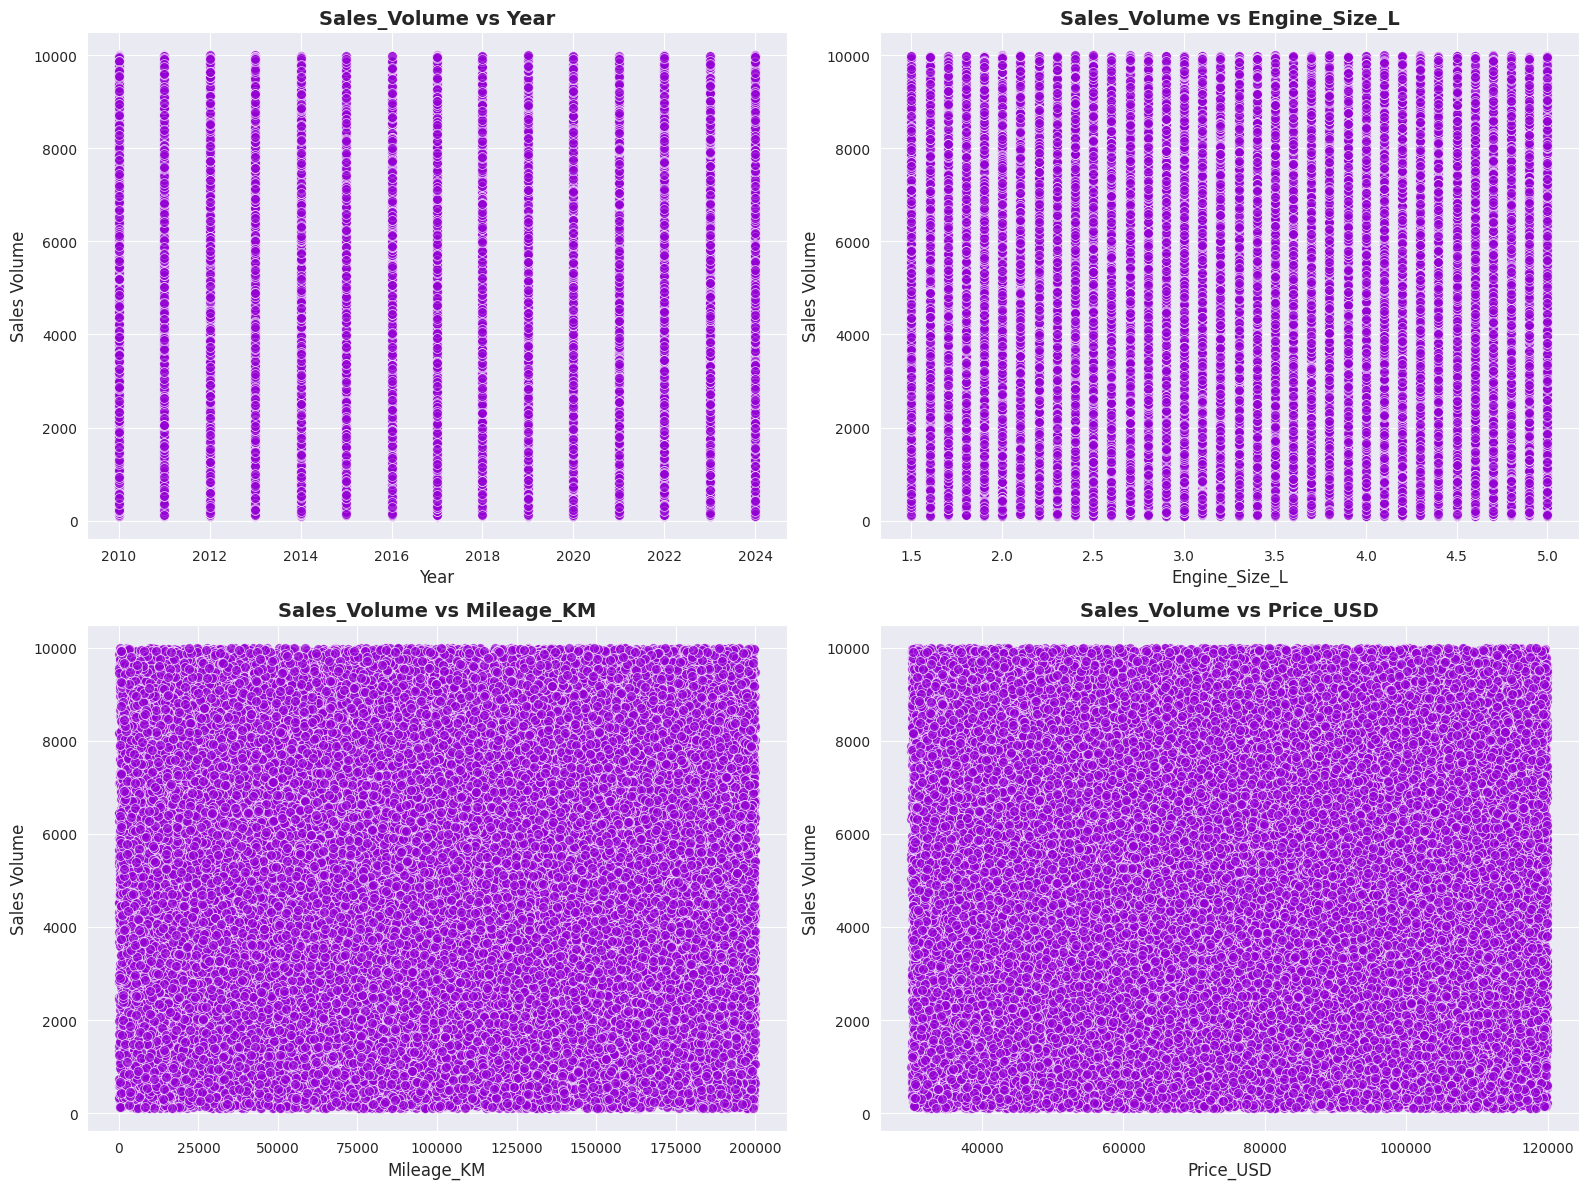

In [ ]:
numerical_features = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

sns.set_style("darkgrid")

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=bmw_df[feature], y=bmw_df['Sales_Volume'], color='darkviolet', alpha=0.7, s=50) # Darker purple, increased size
    plt.title(f'Sales_Volume vs {feature}', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Sales Volume', fontsize=12)
plt.tight_layout()
plt.show()



> Hasil visualisasi scatter plot mengindikasikan tidak adanya korelasi linear yang kuat antara fitur numerik dengan target prediksi, terlihat dari sebaran data yang membentuk pola acak (random). Kondisi ini menjadi tantangan tersendiri bagi algoritma Regression Tree dan KNN, karena model harus bekerja ekstra keras untuk menemukan pola tersembunyi  di tengah data yang tidak memiliki tren yang jelas ini.



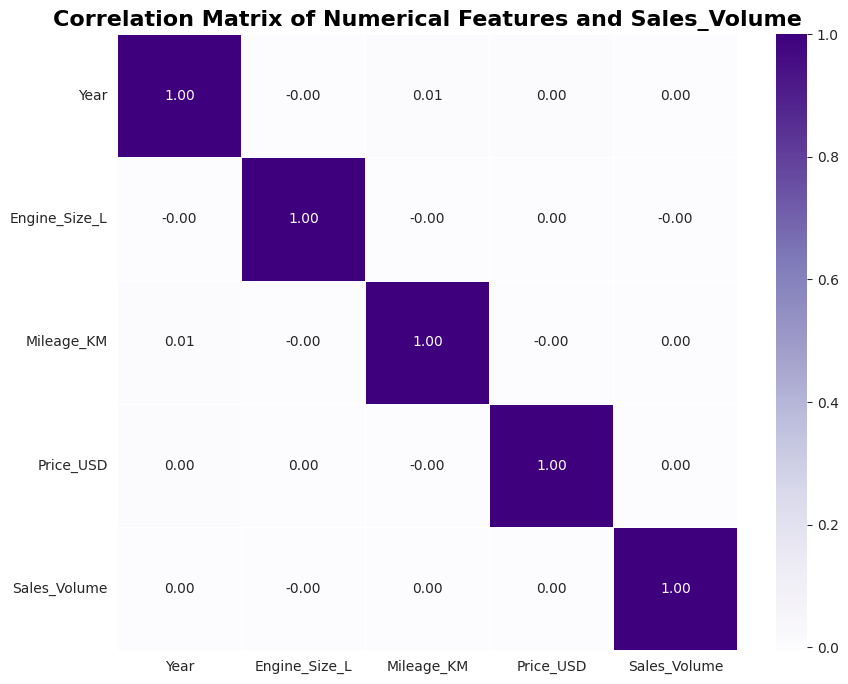

In [ ]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='Purples',
            fmt='.2f',
            linewidths=.5,
            linecolor='white',
            cbar=True)

# Judul dengan warna Ungu Gelap (Indigo) biar seragam sama plot sebelumnya
plt.title('Correlation Matrix of Numerical Features and Sales_Volume',
          fontsize=16, fontweight='bold', color='black')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)

plt.show()



> Matriks korelasi menunjukkan bahwa tidak ada fitur yang memiliki hubungan linear dengan variabel respon, Karena nilai korelasi mendekati nol mutlak. Maka akan dicoba, penggunaan algoritma non-linear seperti K-Nearest Neighbors (KNN) dan Decision Tree (Regression Tree), dan akan dilihat kemampuan kedua algoritma dalam menangkap pola non-linear yang tersembunyi.

## **_Training Model_**

Training model akan dilakukan pada dua metode yaitu, Regression Tree dan KNN-Regression. Akan dibandingkan kedua metode tersebut, dan juga dilakukan pada data yang di scaled dan pada data yang tidak di scaled, untuk melihat seberapa berpengaruh scaling dilakukan. Maka akan dibuat model dengan data train dan akan dibandingkan dengan data test, maka dapat dilakukan seperti berikut.

In [ ]:
# Initialize and train the DecisionTreeRegressor model
reg_tree_model = DecisionTreeRegressor(random_state=42)
reg_tree_model.fit(X_train[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Initialize and train the DecisionTreeRegressor model
reg_tree_model = DecisionTreeRegressor(random_state=42)
reg_tree_model.fit(X_train_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Initialize and train the KNeighborsRegressor model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

KNeighborsRegressor()

In [ ]:
# Initialize and train the KNeighborsRegressor model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

KNeighborsRegressor()

## **_Model Performance_**

---
Akan dibandingkan kedua metode dengan dua data tersebut, dengan menggunakan plot dan metrik evaluasi yang sering digunakan pada regresi yaitu, MAE, MSE, RMSE. Maka dapat dilakukan sebagai berikut.


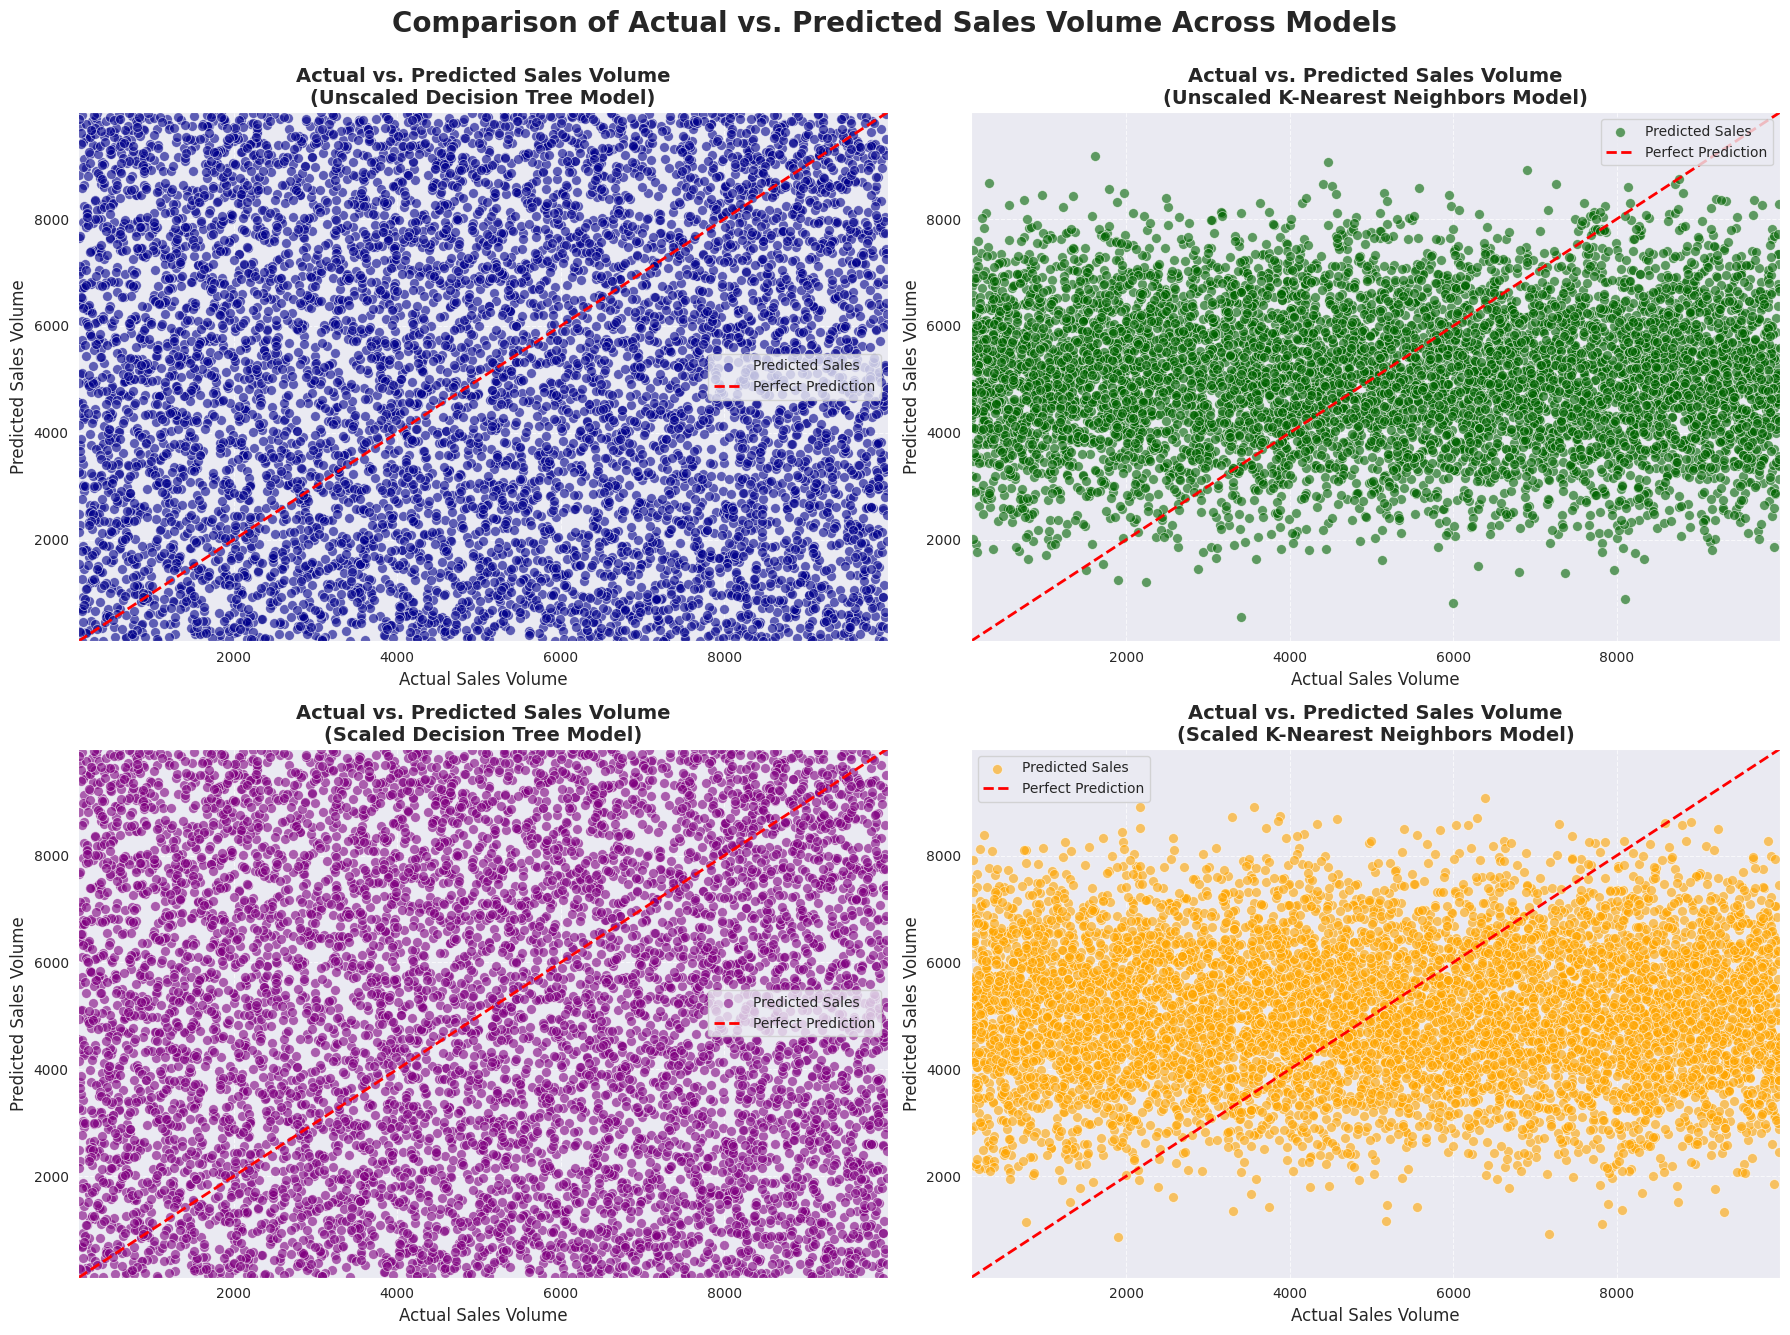

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten() # Flatten the 2x2 array of axes for easier iteration

# Define the models and their predictions with descriptive titles
models_to_plot = [
    (y_pred_reg_tree_unscaled, 'Unscaled Decision Tree', 'darkblue'),
    (y_pred_knn_unscaled, 'Unscaled K-Nearest Neighbors', 'darkgreen'),
    (y_pred_reg_tree_scaled, 'Scaled Decision Tree', 'purple'),
    (y_pred_knn_scaled, 'Scaled K-Nearest Neighbors', 'orange')
]

# Iterate through each model and create a subplot
for i, (y_pred, title, color) in enumerate(models_to_plot):
    ax = axes[i]

    # Create scatter plot
    sns.scatterplot(x=y_test, y=y_pred, color=color, alpha=0.6, s=50, label='Predicted Sales', ax=ax)

    # Add a 45-degree reference line
    min_val = min(y_test.min(), y.min(), y_pred.min())
    max_val = max(y_test.max(), y.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

    # Set title and labels
    ax.set_title(f'Actual vs. Predicted Sales Volume\n({title} Model)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Actual Sales Volume', fontsize=12)
    ax.set_ylabel('Predicted Sales Volume', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=10)
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)

# Adjust layout and add a main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.suptitle('Comparison of Actual vs. Predicted Sales Volume Across Models', fontsize=20, fontweight='bold')
plt.show()



> Berdasarkan hasil visualisasi, dapat disimpulkan bahwa Decision Tree, baik dengan maupun tanpa scaling, menunjukkan performa prediksi yang rendah. Model ini tidak mampu mengikuti pola hubungan antara input dan output dengan baik pada dataset ini. KNN tanpa scaling bekerja dengan sangat buruk karena ketidakseimbangan skala fitur mempengaruhi perhitungan jarak.
KNN dengan scaling memberikan hasil paling akurat dan konsisten. Sebagian besar prediksi lebih dekat dengan nilai aktual, menunjukkan bahwa scaling merupakan langkah krusial bagi metode berbasis jarak seperti KNN.



In [ ]:

y_pred_reg_tree = reg_tree_model.predict(X_test[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']])

mae_reg_tree = mean_absolute_error(y_test, y_pred_reg_tree)
mse_reg_tree = mean_squared_error(y_test, y_pred_reg_tree)
rmse_reg_tree = np.sqrt(mse_reg_tree)

print("Regression Tree Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_reg_tree:.2f}")
print(f"Mean Squared Error (MSE): {mse_reg_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_reg_tree:.2f}")

Regression Tree Model Performance:
Mean Absolute Error (MAE): 3041.96
Mean Squared Error (MSE): 13640916.64
Root Mean Squared Error (RMSE): 3693.36


In [ ]:

numerical_features_dt = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

reg_tree_model_scaled.fit(X_train_scaled[numerical_features_dt], y_train)

y_pred_reg_tree_scaled = reg_tree_model_scaled.predict(X_test_scaled[numerical_features_dt])

mae_reg_tree_scaled = mean_absolute_error(y_test, y_pred_reg_tree_scaled)
mse_reg_tree_scaled = mean_squared_error(y_test, y_pred_reg_tree_scaled)
rmse_reg_tree_scaled = np.sqrt(mse_reg_tree_scaled)

print("Scaled Regression Tree Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_reg_tree_scaled:.2f}")
print(f"Mean Squared Error (MSE): {mse_reg_tree_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_reg_tree_scaled:.2f}")

Scaled Regression Tree Model Performance:
Mean Absolute Error (MAE): 3348.35
Mean Squared Error (MSE): 16798096.86
Root Mean Squared Error (RMSE): 4098.55


In [ ]:

numerical_features_knn = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

knn_model_scaled.fit(X_train_scaled[numerical_features_knn], y_train)

y_pred_knn_scaled = knn_model_scaled.predict(X_test_scaled[numerical_features_knn])

mae_knn_scaled = mean_absolute_error(y_test, y_pred_knn_scaled)
mse_knn_scaled = mean_squared_error(y_test, y_pred_knn_scaled)
rmse_knn_scaled = np.sqrt(mse_knn_scaled)

print("Scaled K-Nearest Neighbors Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_knn_scaled:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn_scaled:.2f}")

Scaled K-Nearest Neighbors Regression Model Performance:
Mean Absolute Error (MAE): 2651.25
Mean Squared Error (MSE): 9906524.63
Root Mean Squared Error (RMSE): 3147.46


In [ ]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']])

# Calculate evaluation metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print("K-Nearest Neighbors Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")

K-Nearest Neighbors Regression Model Performance:
Mean Absolute Error (MAE): 2562.79
Mean Squared Error (MSE): 8916167.03
Root Mean Squared Error (RMSE): 2986.00


In [ ]:
# Create a dictionary to hold the performance metrics for all models
performance_data = {
    'Metrik': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)'],
    'Regression Tree (Unscaled)': [mae_reg_tree_unscaled, mse_reg_tree_unscaled, rmse_reg_tree_unscaled],
    'K-Nearest Neighbors (Unscaled)': [mae_knn_unscaled, mse_knn_unscaled, rmse_knn_unscaled],
    'Regression Tree (Scaled)': [mae_reg_tree_scaled, mse_reg_tree_scaled, rmse_reg_tree_scaled],
    'K-Nearest Neighbors (Scaled)': [mae_knn_scaled, mse_knn_scaled, rmse_knn_scaled]
}

# Create a DataFrame from the performance data
performance_df_updated = pd.DataFrame(performance_data)

# Format numerical columns for better readability
for col in performance_df_updated.columns[1:]:
    performance_df_updated[col] = performance_df_updated[col].map('{:.2f}'.format)

# Display the updated performance comparison table
display(performance_df_updated)

Metrik Regression Tree (Unscaled)  \
0       Mean Absolute Error (MAE)                    3352.63   
1        Mean Squared Error (MSE)                16847724.34   
2  Root Mean Squared Error (RMSE)                    4104.60   

  K-Nearest Neighbors (Unscaled) Regression Tree (Scaled)  \
0                        2677.79                  3348.35   
1                    10056579.75              16798096.86   
2                        3171.21                  4098.55   

  K-Nearest Neighbors (Scaled)  
0                      2651.25  
1                   9906524.63  
2                      3147.46



> Perbandingan performa antara Regression Tree dan K-Nearest Neighbors (KNN) menunjukkan perbedaan karakteristik yang sangat jelas berdasarkan kondisi data unscaled dan scaled. Pada kondisi unscaled, KNN sudah menunjukkan performa yang lebih baik dibandingkan Regression Tree pada semua metrik evaluasi. Nilai MAE, MSE, dan RMSE KNN unscaled lebih rendah daripada Regression Tree unscaled, yang mengindikasikan bahwa prediksi KNN secara umum lebih dekat dengan nilai aktual. Hal ini terjadi karena struktur data masih cukup mendukung penggunaan jarak Euclidean, meskipun belum distandarisasi sepenuhnya. Sebaliknya, Regression Tree kurang sensitif terhadap skala data sehingga performanya cenderung stabil, namun tetap menghasilkan error yang lebih tinggi dibandingkan KNN.


> Ketika data distandarisasi (scaled), peningkatan performa terlihat jelas pada metode KNN. Nilai MAE, MSE, dan RMSE pada KNN scaled merupakan yang paling rendah di antara semua model, menandakan bahwa standarisasi fitur sangat membantu metode berbasis jarak ini. Proses scaling membuat semua fitur berada pada skala yang setara, sehingga perhitungan jarak menjadi lebih proporsional dan tidak didominasi oleh variabel dengan skala besar. Regression Tree scaled kembali menunjukkan pola yang sama seperti kondisi unscaled, yaitu performanya hampir tidak berubah. Hal ini konsisten dengan sifat Regression Tree yang membuat pemisahan berdasarkan threshold fitur, bukan berdasarkan jarak atau magnitudo fitur, sehingga normalisasi tidak memberi dampak signifikan.
> Secara keseluruhan, perbandingan kedua metode ini menunjukkan bahwa KNN adalah metode yang lebih unggul pada dataset ini, terutama setelah dilakukan standarisasi. KNN scaled mampu menghasilkan error paling rendah dan prediksi paling akurat. Sebaliknya, Regression Tree menunjukkan performa yang relatif konstan tetapi lebih tinggi tingkat errornya. Temuan ini mempertegas bahwa KNN sangat bergantung pada preprocessing seperti scaling, sementara Regression Tree lebih robust terhadap skala data namun tidak mencapai tingkat akurasi setinggi KNN. Dengan demikian, metode terbaik untuk dataset ini adalah K-Nearest Neighbors (Scaled).



## **Kesimpulan**

Seluruh rangkaian proses analisis Machine Learning yang meliputi pemahaman konsep supervised learning, pemilihan algoritma regresi, pembagian data, penerapan preprocessing berupa standarisasi, pelatihan model, serta evaluasi menggunakan metrik MAE, MSE, dan RMSE menunjukkan pola performa yang konsisten antara metode yang digunakan. Regression Tree dan K-Nearest Neighbors (KNN) diuji pada kondisi data unscaled dan scaled untuk melihat pengaruh preprocessing terhadap akurasi prediksi. Hasil evaluasi menunjukkan bahwa Regression Tree memberikan performa yang relatif stabil di kedua kondisi karena sifat algoritma ini tidak bergantung pada ukuran atau skala fitur. Meskipun demikian, akurasi yang dihasilkan Regression Tree selalu berada di bawah performa KNN, baik sebelum maupun sesudah dilakukan scaling.

Di sisi lain, KNN menunjukkan peningkatan performa yang signifikan setelah data distandarisasi. Karena KNN mengandalkan perhitungan jarak antar data, proses scaling membuat setiap fitur memiliki kontribusi yang seimbang dalam menentukan tetangga terdekat, sehingga menghasilkan nilai MAE, MSE, dan RMSE yang lebih rendah dibandingkan kondisi unscaled. Secara keseluruhan, hasil yang diperoleh menegaskan bahwa KNN dengan data yang telah distandarisasi merupakan model dengan performa terbaik dalam tugas regresi pada dataset ini. Temuan ini menunjukkan bahwa dalam penerapan Machine Learning, pemilihan algoritma harus mempertimbangkan karakteristik data, serta preprocessing seperti standarisasi dapat menjadi faktor kunci yang sangat menentukan kualitas prediksi suatu model.

# Referensi

---

Bishop, C. M. (2006). Pattern Recognition and Machine Learning. New York: Springer.

Breiman, L., Friedman, J., Stone, C. J., & Olshen, R. A. (1984). Classification and Regression Trees. Boca Raton: CRC Press.

Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. IEEE Transactions on Information Theory, 13(1), 21-27.

Han, J., Kamber, M., & Pei, J. (2012). Data Mining: Concepts and Techniques (3rd ed.). Waltham: Morgan Kaufmann.

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: with Applications in R. New York: Springer.

Mitchell, T. M. (1997). Machine Learning. New York: McGraw-Hill.

Müller, A. C., & Guido, S. (2017). Introduction to Machine Learning with Python: A Guide for Data Scientists. Sebastopol: O'Reilly Media.